##### MEDICAL INSURANCE PROJECT
### AUTHOR : Masinde Victor Kiprono

### BUSINESS UNDERSTANDING
## Project Overview
One of the basic needs of a human being is access to emdical care. Everyday we have people dying to the inability to access affordable medical attention. Insurance is key in ensuring that everybody is cattered for healthwise. In this project we are going to explore the factore that affect the insurance fees for different patients. lets dive straight into it


In [1]:
# Import the necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Data Understanding
For this project, we are using data sourced from kaggle. The data was initially stored in CSV format. Here we import our data to the notebook and explore it further. The data has seven columns namely `age`, `sex`, `bmi`, `children`, `smoker`, `region` and `charges`.Among these columns, four are made of numeric entries while three columns are in text form. The data has 1338 rows. We can also see from the statisticcal summary that the highest BMI is 53 while the lowest is 15.96. The oldest person is of 64 years while the youngest is 18 years old. These give us a glimples of our data before we start the real analysis.

In [2]:
# import the data and read it to notebook
df=pd.read_csv("Health_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check for the shape of the data
df.shape

(1338, 7)

In [4]:
#check for the detailed summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check for the statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning
We need to clean data before analysing it to avoid errors. We check for missing values, duplicates and any other issues that could lead us to wrong conlusions in our analysis. The data had 1 duplicated entry which we deleted. We found no missing values in the data. While checking for outliers, large charges appeared on a right skew. After applying log function which shrinks large values and spreads the small values, we have a better intrepretation. We can therefore proceed to further EDA

In [6]:
# Check for duplicates
#df.duplicated()
duplicates = df[df.duplicated()]
duplicates

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
#Drop the duplicated row and check again 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

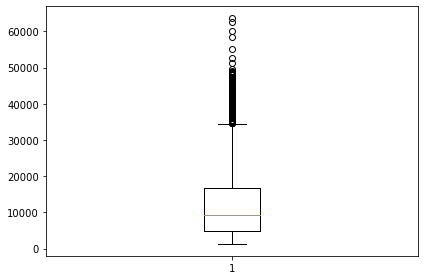

In [9]:
plt.boxplot(df['charges'])
plt.tight_layout()
plt.show()

In [10]:
# Log charges column
df['log_charges'] = np.log(df['charges'] + 1)


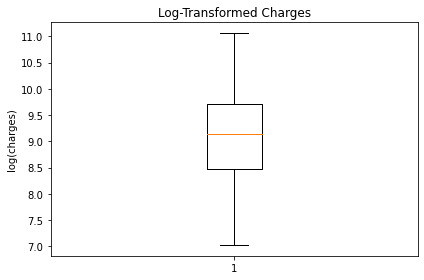

In [11]:
# Plot the graph for logged charges
plt.boxplot(df['log_charges'])
plt.title('Log-Transformed Charges')
plt.ylabel('log(charges)')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis
In this section we are going to explore our data using visualizations. We can get a clear image of our data using different graphs and then decide from there the suitable model to use.

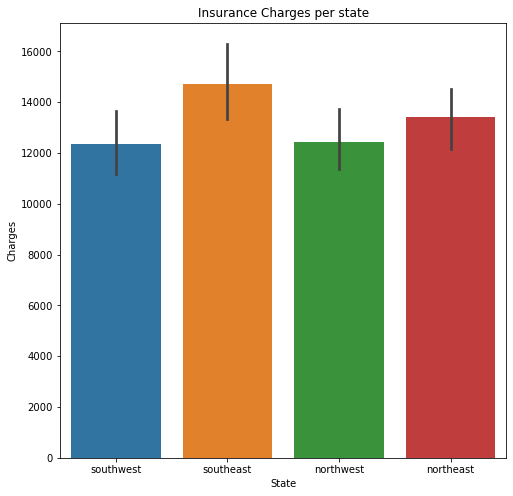

In [12]:
# Plot the bar graph showing age
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='region', y='charges')
plt.title("Insurance Charges per state")
plt.xlabel("State")
plt.ylabel("Charges");

We have the highest charges coming from the southeast region. The soutwest and the northwest regions have the lowest charges. This shows that residential location of a pesron can affect their insurance cover charges. This is because insurance companies consider factor like accesibility to a clean enviroment, water and proper waste disposal. These factors can easily cause diseases and therefore cost the insurance companies

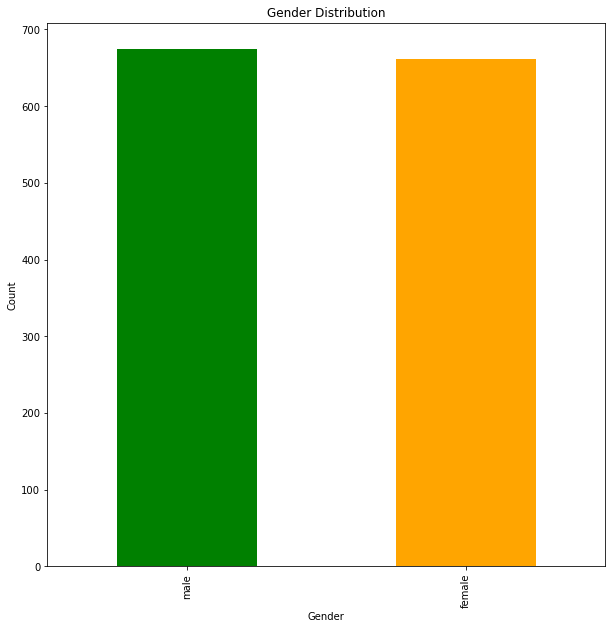

In [ ]:
#Check the distribution of males to females
colors = ['green', 'orange']
plt.figure(figsize=(10,10))
df['sex'].value_counts().plot(kind='bar', color=colors)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count");

In [ ]:
#Actual count of males and females
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

The distribution of males to females in our dataset is balanced. We have 675 males and 662 females.

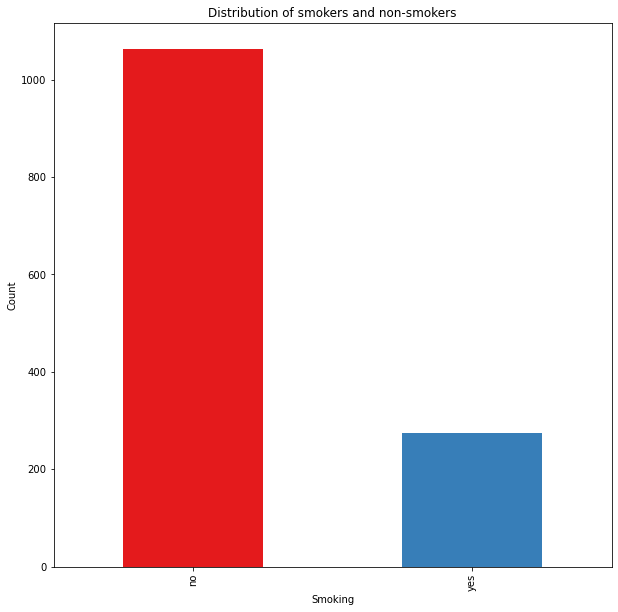

In [38]:
# Distribution of smokers
colors = sns.color_palette("Set1")
plt.figure(figsize=(10,10))
df['smoker'].value_counts().plot(kind='bar', color=colors)
plt.title("Distribution of smokers and non-smokers")
plt.xlabel("Smoking")
plt.ylabel("Count");

In [25]:
#Actual count of smokers and non-smokers
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

We have a high number of people who do not smoke as compared to those who smoke. This is a good gesture as smoking can affect the health of an individual greatly and may also affect negatively the isnurance charges that he has to pay for medical cover.

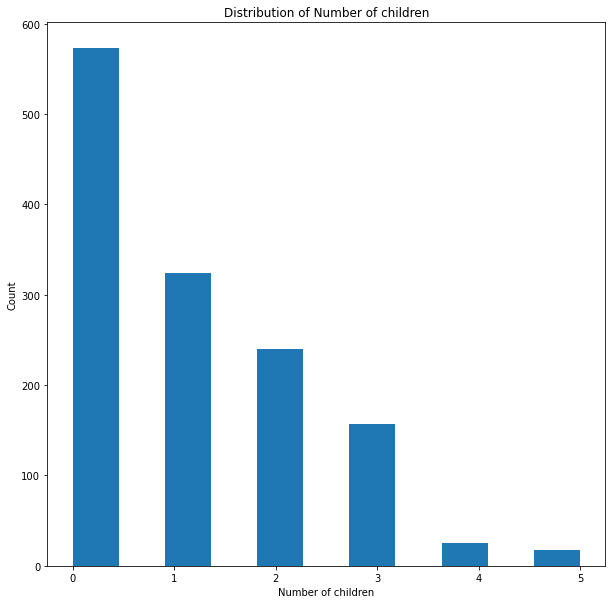

In [35]:
#Distribution of Number of children
plt.figure(figsize=(10,10))
plt.hist(df['children'],bins =11)
plt.title("Distribution of Number of children")
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.tight_layout;

We have a gradual trend when it comes to the number of children that individual sin our dataset have. Most have no children and only a few portion have 5 children. This might be the because the dataset has been picked from a young age group

In [ ]:
#Categorize the population into different groups based on their age
labels = ['Children', 'Youth', 'Middle-aged', 'Aged']
df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)

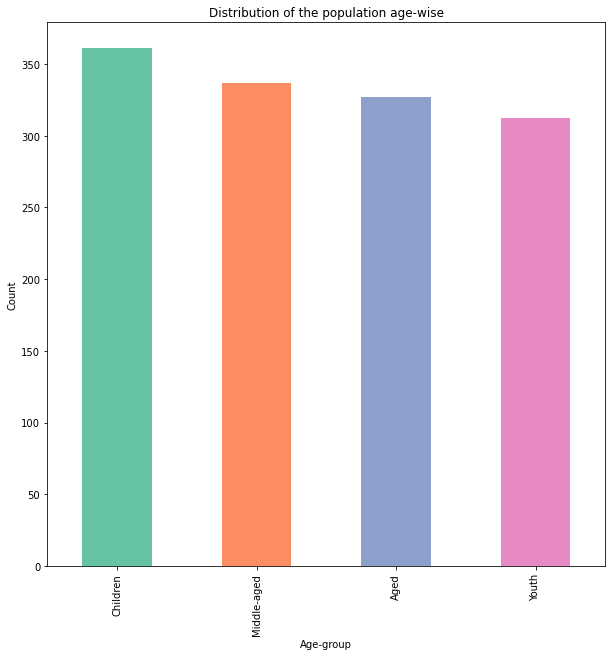

In [39]:
# Distribution of smokers
colors = sns.color_palette("Set2")
plt.figure(figsize=(10,10))
df['age_group'].value_counts().plot(kind='bar', color=colors)
plt.title("Distribution of the population age-wise")
plt.xlabel("Age-group")
plt.ylabel("Count");

We have a high population of children followed by the middled age. The youth have the smallest portion in the dataset

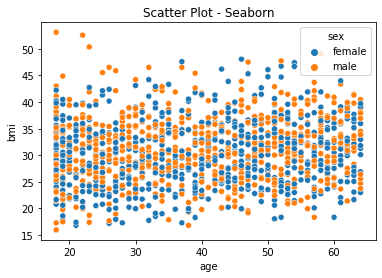

In [ ]:
#Correlation between age and BMI
sns.scatterplot(data=df, x='age', y='bmi', hue='sex')
plt.title('Scatter Plot - Seaborn')
plt.show()



From the scatter plot above, we can see that there is no defined relationship between age and BMI. The plots do not follow a specific pattern

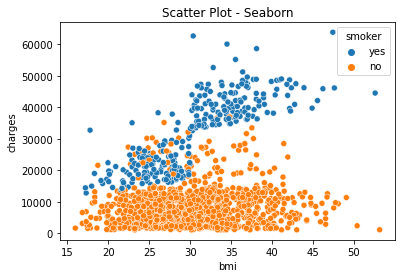

In [23]:
# Correlation between BMI and Insurance charges
sns.scatterplot(data=df, y='charges', x='bmi', hue='smoker')
plt.title('Scatter Plot - Seaborn')
plt.show()

From the above visualization we can see two groups of people, The smokers and non-smokers. For the smokers, with increase in BMI, there is a rapid increase in insurance charges.
The non-smokers have relatively low insurance charges (Most fall below the 10,000 mark). Even as BMI increases for non-smokers, the change in charges is minimal. This indicates that smoking directly affects the insurance charges an individual is going to incur. Smokers pay significantly higher insurance charges than non-smokers at any BMI.